# Building all models and SHAP analysis
Using `src.model_builder` I build models for each cell type and gene of interest. Totalling 28 models (there are 4 more to go for cell type Mast). 

In [1]:
import src.model_builder as mb
import modin.pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
cell_types = ['B_cell', 'EC', 'Myeloid', 'Cancer', 'Fibroblast', 'T_cell', 'DC', 'Mast']
genes = ["ESR1", "ERBB2", "CDK1", "CDK4"]

In [44]:
params = {'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.03,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 5,
 'missing': float("nan"),
 'monotone_constraints': '()',
 'n_estimators': 1000,
 'n_jobs': 90,
 'num_parallel_tree': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0,
 'seed': None}

The models are organized in a dictionary of dictionary where each cell type has its own class containing the genes. Individual models can be accessed with `models[cell_type][gene]`

In [26]:
models = {}

In [32]:
model.datasets

{}

In [49]:
models[cell_type] = model

In [50]:
for gene in genes:
        save_path = f"plots/{cell_type}/{gene}.png"
        model.plot_results(gene, savefig=save_path)

In [ ]:
for cell_type in cell_types[1:]:
    print("==================================================")
    print(cell_type.upper())
    model = mb.CellLevelModel(cell_type, genes)
    model.build_datasets(diff_lim=0)
    model.build_model(params)
    for gene in genes:
        save_path = f"plots/{cell_type}/{gene}.png"
        model.plot_results(gene, savefig=save_path)
    models[cell_type] = model

EC
Building ESR1 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed
Building ERBB2 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed
Building CDK1 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed
Building CDK4 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed

EC - ESR1 ERBB2 CDK1 CDK4 

   ESR1:
      Performing 5 fold cross-validation on ESR1 -  380 iters
      rmse: 0.3005154
      Building regression model for ESR1, n_estimators=380 ... Complete
   ERBB2:
      Performing 5 fold cross-validation on ERBB2 -  999 iters
      rmse: 0.692671
      Building regression model for ERBB2, n_estimators=999 ... Complete
   CDK1:
      Performing 5 fold cross-validation on CDK1 -  999 iters
      rmse: 1.1700278000000002
      Building regression model for CDK1, n_estimators=999 ... Complete
   CDK4:
      Performing 5 fold cross-validation on CDK4 -  999 iters
      rmse: 1.0411848
      Building regression model for CDK4, n_estimators=999 ... Complete
MODEL BUILDING COMPLETE


MYELOID
Building ESR1 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed
Building ERBB2 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed
Building CDK1 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed
Building CDK4 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed

MYELOID - ESR1 ERBB2 CDK1 CDK4 

   ESR1:
      Performing 5 fold cross-validation on ESR1 -  85 iters
      rmse: 1.2396862
      Building regression model for ESR1, n_estimators=85 ... Complete
   ERBB2:
      Performing 5 fold cross-validation on ERBB2 -  999 iters
      rmse: 0.4063478
      Building regression model for ERBB2, n_estimators=999 ... Complete
   CDK1:
      Performing 5 fold cross-validation on CDK1 -  999 iters
      rmse: 0.6463666
      Building regression model for CDK1, n_estimators=999 ... Complete
   CDK4:
      Performing 5 fold cross-validation on CDK4 -  999 iters
      rmse: 0.8155053999999999
      Building regression model for CDK4, n_estimators=999 ... Complete
MODEL BUILDING COMPLETE


CANCER
Building ESR1 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed
Building ERBB2 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed
Building CDK1 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed
Building CDK4 dataset...Computing correlations and selecting input variables


  0%|          | 0/28635 [00:00<?, ?it/s]

 Completed

CANCER - ESR1 ERBB2 CDK1 CDK4 

   ESR1:
      Performing 5 fold cross-validation on ESR1 -  271 iters
      rmse: 0.8286874000000001
      Building regression model for ESR1, n_estimators=271 ... Complete
   ERBB2:
      Performing 5 fold cross-validation on ERBB2 -  

In [184]:
complete_results = pd.DataFrame()

In [185]:
for cell in cell_types[:-1]:
    complete_results = complete_results.append(models[cell]._cv_results)

In [186]:
complete_results["target gene var"] = var

In [188]:
complete_results.sort_values("test-rmse-mean")

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std,target gene var
DC-ESR1,0.199641,0.164361,0.078763,0.022017,0.799410
EC-ESR1,0.300515,0.160592,0.111517,0.025964,0.399815
DC-CDK1,0.394600,0.191138,0.005837,0.002512,0.422846
Myeloid-ERBB2,0.406348,0.041568,0.041657,0.004261,0.655685
Fibroblast-CDK1,0.444388,0.101144,0.055790,0.006728,0.321437
T_cell-ERBB2,0.496863,0.090666,0.292627,0.012729,0.570113
T_cell-ESR1,0.507784,0.113999,0.450913,0.029511,1.612616
DC-ERBB2,0.549531,0.289324,0.003819,0.000474,1.000703
B_cell-CDK1,0.566118,0.346377,0.033761,0.009442,1.613677
B_cell-ERBB2,0.576694,0.066754,0.106390,0.008785,0.168882


In [65]:
complete_results.columns = ["mean test rmse", "test error std", "mean training rmse", "training error std"]

Hypothesis: the better scoring subdatasets have less variance in target gene expression.

In [167]:
variance = []
for cell_type in cell_types[:-1]:
    for gene in genes:
        X, y = models[cell_type].get_data(gene)
        variance.append(y.var())

In [176]:
var = pd.DataFrame(variance, columns=["target gene var"], index=complete_results.index)

In [177]:
var

,target gene var
DC-ESR1,0.799410
EC-ESR1,0.399815
DC-CDK1,0.422846
Myeloid-ERBB2,0.655685
Fibroblast-CDK1,0.321437
T_cell-ERBB2,0.570113
T_cell-ESR1,1.612616
DC-ERBB2,1.000703
B_cell-CDK1,1.613677
B_cell-ERBB2,0.168882


## Results: scores
The full result table is below. Further down the tables are sorted by cell type for easier comparison

In [66]:
complete_results = complete_results.sort_values("mean test rmse")
complete_results

,mean test rmse,test error std,mean training rmse,training error std
DC-ESR1,0.199641,0.164361,0.078763,0.022017
EC-ESR1,0.300515,0.160592,0.111517,0.025964
DC-CDK1,0.394600,0.191138,0.005837,0.002512
Myeloid-ERBB2,0.406348,0.041568,0.041657,0.004261
Fibroblast-CDK1,0.444388,0.101144,0.055790,0.006728
T_cell-ERBB2,0.496863,0.090666,0.292627,0.012729
T_cell-ESR1,0.507784,0.113999,0.450913,0.029511
DC-ERBB2,0.549531,0.289324,0.003819,0.000474
B_cell-CDK1,0.566118,0.346377,0.033761,0.009442
B_cell-ERBB2,0.576694,0.066754,0.106390,0.008785


In [111]:
# Add cell counts to dataframe
cell_counts = {"T_cell" : 14273, "Cancer" : 12950, "Fibroblast":5654, "B_cell" : 1965, "EC":1963, "Myeloid":1957, "DC":362, "Mast":354}

cell_count_array = []
for index in complete_results.index:
    cell_ = index.split("-")[0]
    cell_count_array.append(cell_counts[cell_])
    
complete_results["cell_counts"] = cell_count_array

In [67]:
# Group results by gene
gene_level_results = {}
for gene in genes:
        gene_level_results[gene] = pd.DataFrame()
        for index in complete_results.index:
            if gene in index:
                gene_level_results[gene] = gene_level_results[gene].append(complete_results.loc[index])
                gene_level_results[gene] = gene_level_results[gene].rename(index={index : index.split("-")[0]})

In [68]:
# Group results by cell type
cell_level_results = {}
for cell in cell_types[:-1]:
        cell_level_results[cell] = pd.DataFrame()
        for index in complete_results.index:
            if cell in index:
                cell_level_results[cell] = cell_level_results[cell].append(complete_results.loc[index])
                cell_level_results[cell] = cell_level_results[cell].rename(index={index : index.split("-")[1]})

In [69]:
gene_level_results["ERBB2"]

,mean test rmse,mean training rmse,test error std,training error std
Myeloid,0.406348,0.041657,0.041568,0.004261
T_cell,0.496863,0.292627,0.090666,0.012729
DC,0.549531,0.003819,0.289324,0.000474
B_cell,0.576694,0.106390,0.066754,0.008785
EC,0.692671,0.075129,0.146761,0.005205
Fibroblast,0.976188,0.187126,0.089733,0.006892
Cancer,1.262550,0.498483,0.042071,0.011999


In [70]:
print("Average test error across cells:")
for gene in gene_level_results:
    mean_test = gene_level_results[gene]["mean test rmse"].mean()
    print(f"{gene}: {mean_test}")

Average test error across cells:
ESR1: 0.7043677142857143
ERBB2: 0.7086921714285713
CDK1: 0.6836604285714285
CDK4: 0.9324804000000001


In [71]:
cell_level_results["Cancer"]

,mean test rmse,mean training rmse,test error std,training error std
ESR1,0.828687,0.427626,0.041306,0.017445
CDK1,0.964344,0.238924,0.117049,0.007986
CDK4,1.114225,0.423483,0.029112,0.002399
ERBB2,1.262550,0.498483,0.042071,0.011999


In [335]:
print("Average test error across genes:")
for cell in cell_level_results:
    mean_test = cell_level_results[cell]["mean test rmse"].mean()
    print(f"{cell}: {mean_test}")

Average test error across genes:
B_cell: 0.71415625
EC: 0.7882161999999999
Myeloid: 0.7385527
Cancer: 1.02395865
Fibroblast: 0.8657234
T_cell: 0.6052084500000001
DC: 0.5046889


In [72]:
mean_test_results = pd.DataFrame()
for gene in gene_level_results:
    mean_test_results = mean_test_results.append(gene_level_results[gene]["mean test rmse"])
    mean_test_results = mean_test_results.rename({"mean test rmse" : gene})
    
mean_test_results = mean_test_results.append(mean_test_results.mean().rename("Cell: mean"))
mean_test_results["Gene: mean"] = mean_test_results.mean(axis=1)

In [73]:
mean_test_results.at["Cell: mean", "Gene: mean"] = float("NaN")

In [74]:
mean_test_results.sort_values("Gene: mean", inplace=True)

In [75]:
mean_test_results.sort_values("Cell: mean", axis=1, inplace=True)

In [76]:
mean_test_results

,DC,T_cell,B_cell,Myeloid,EC,Fibroblast,Cancer,Gene: mean
CDK1,0.394600,0.599778,0.566118,0.646367,1.170028,0.444388,0.964344,0.683660
ESR1,0.199641,0.507784,0.826548,1.239686,0.300515,1.027712,0.828687,0.704368
ERBB2,0.549531,0.496863,0.576694,0.406348,0.692671,0.976188,1.262550,0.708692
CDK4,0.739451,0.887481,0.889430,0.815505,1.041185,1.040086,1.114225,0.932480
Cell: mean,0.470806,0.622976,0.714697,0.776976,0.801100,0.872094,1.042452,NaN


## Results: plots

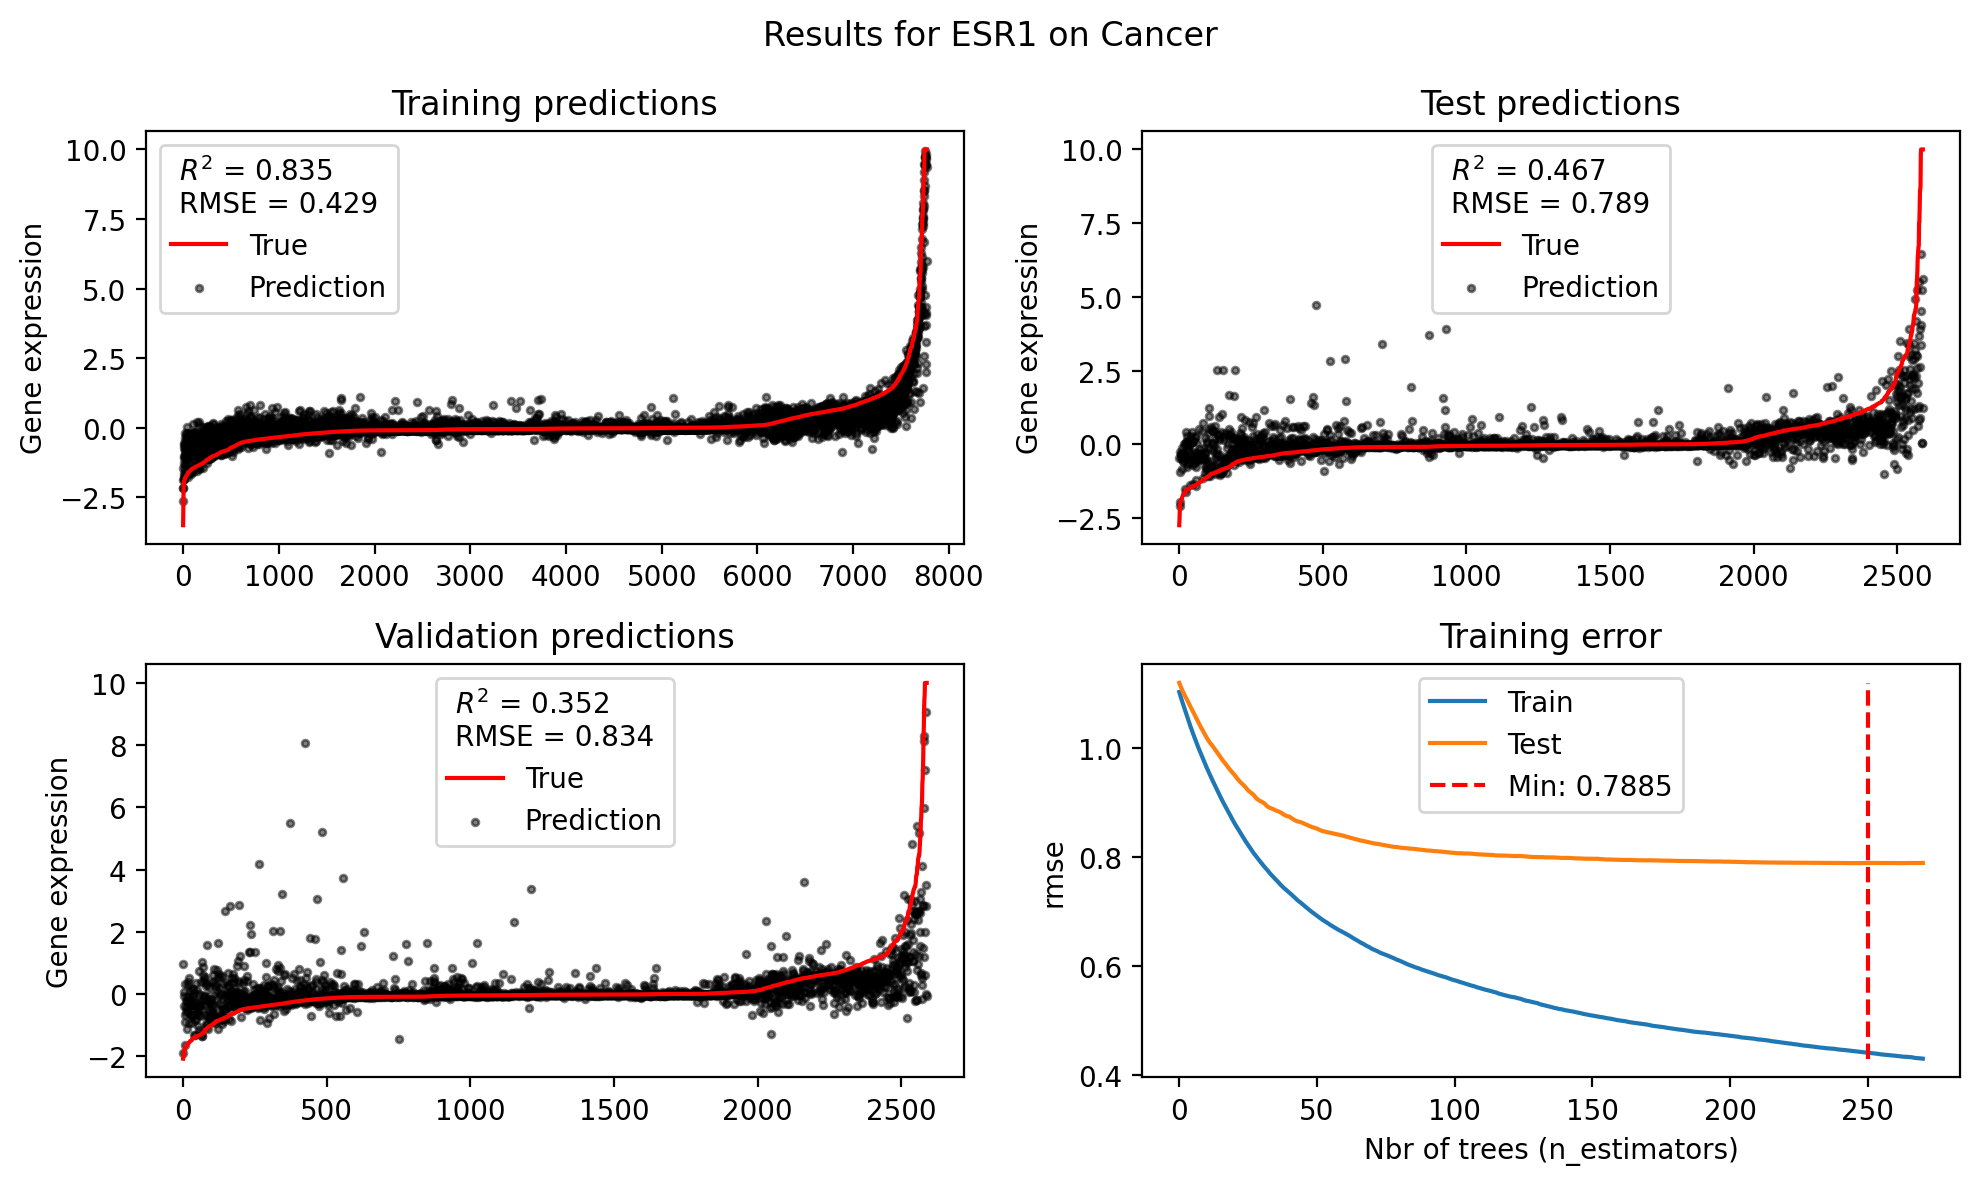

In [189]:
models["Cancer"].plot_results("ESR1")

4
(4,)


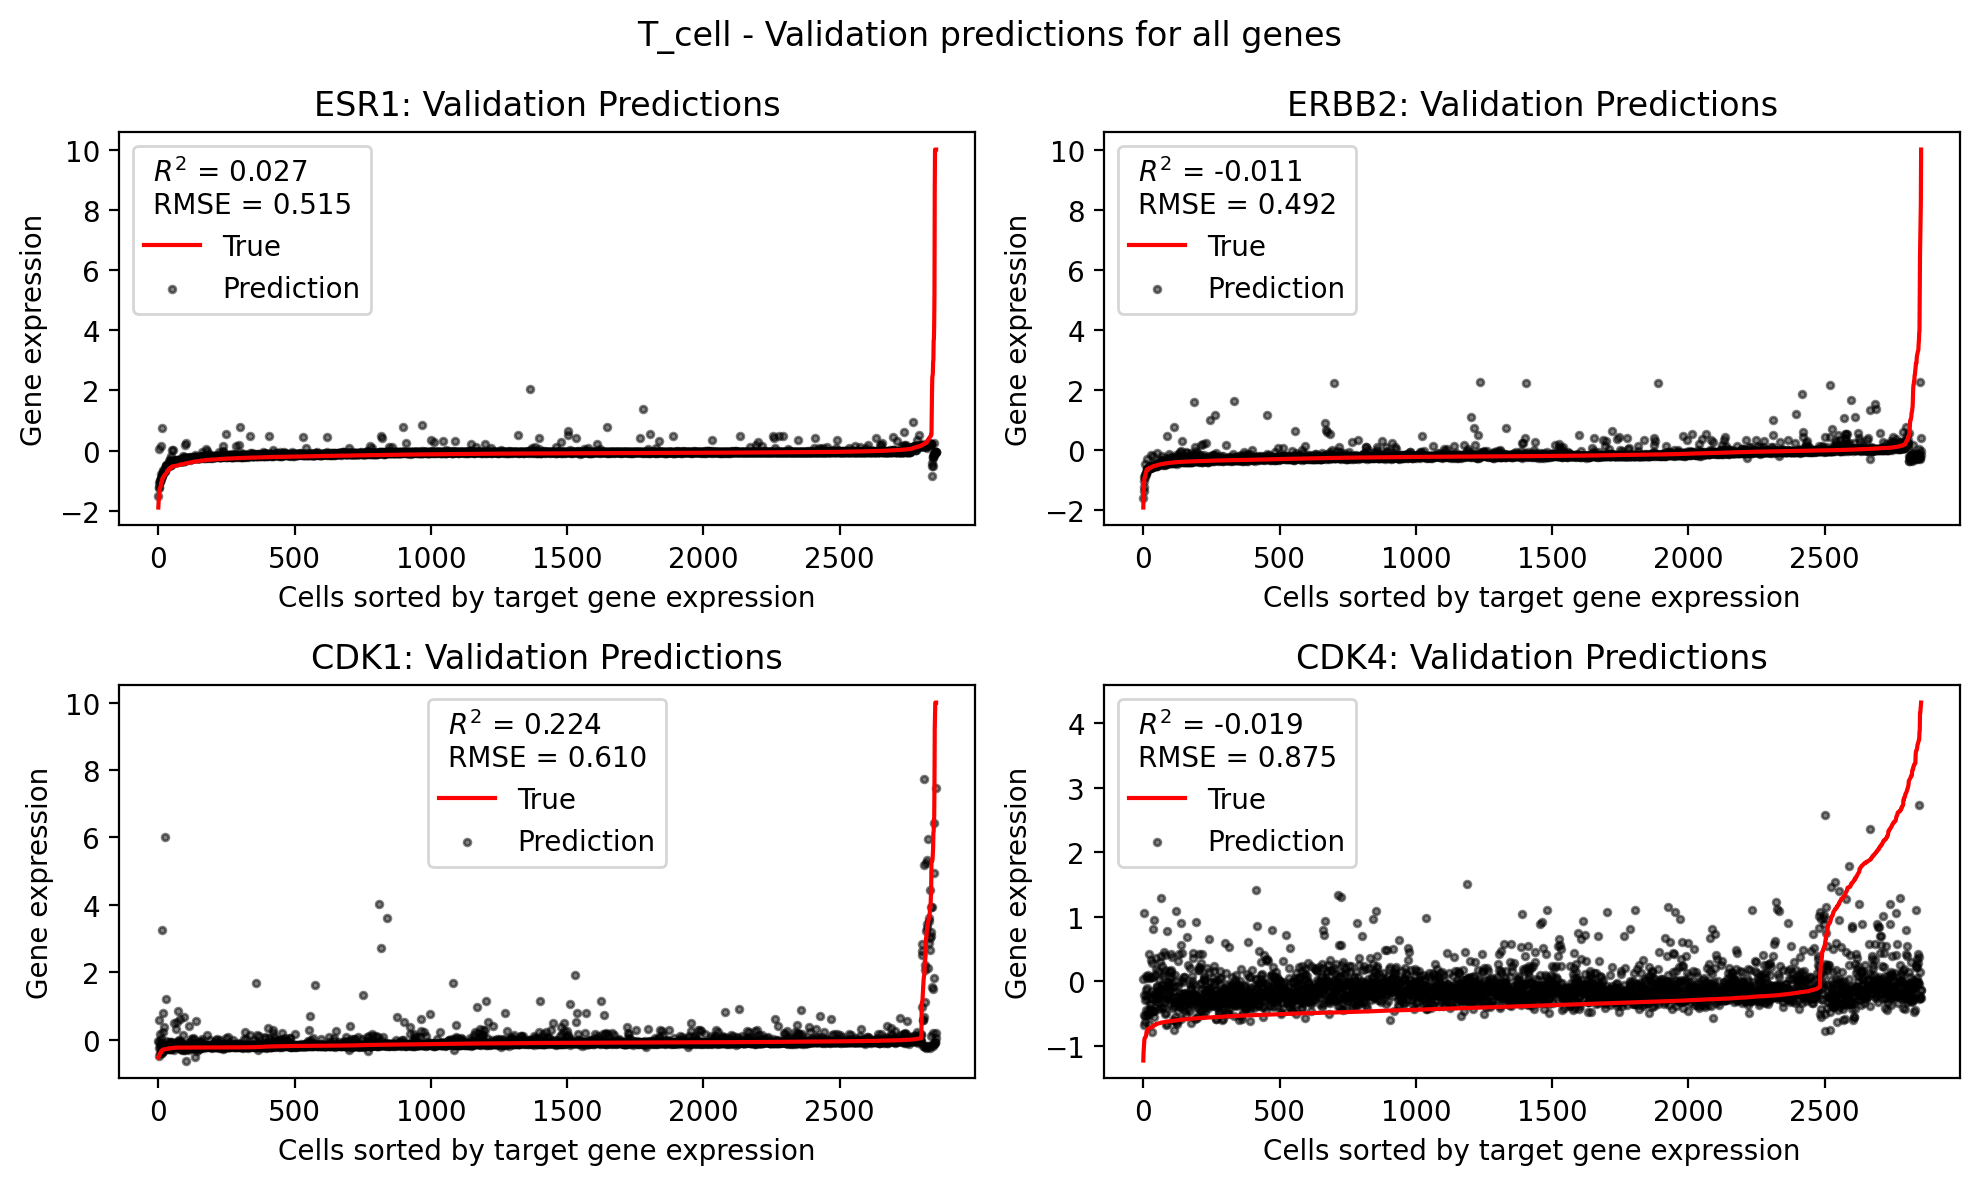

In [194]:
models["T_cell"].plot_validation_all_genes()

4
(4,)


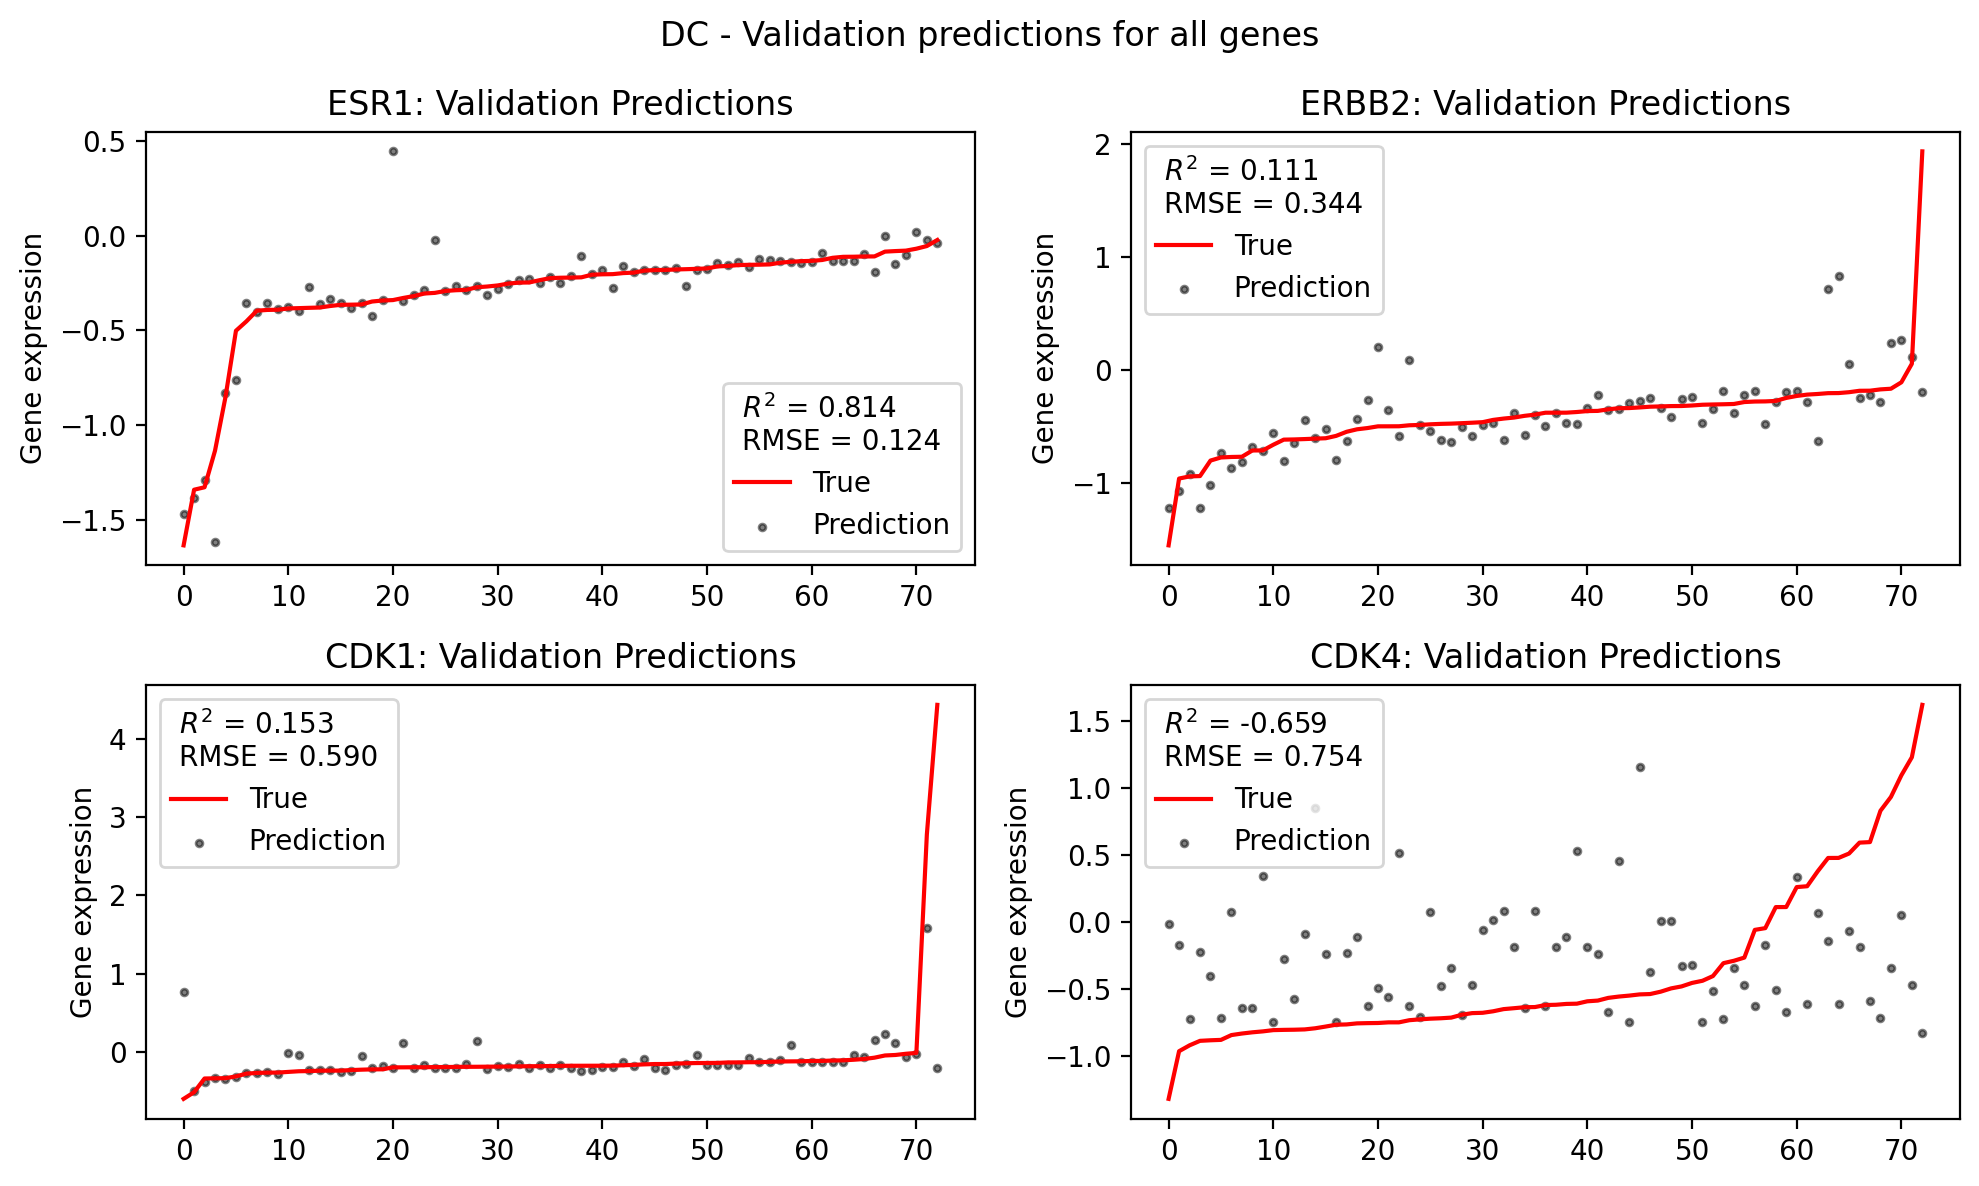

In [192]:
models["DC"].plot_validation_all_genes()

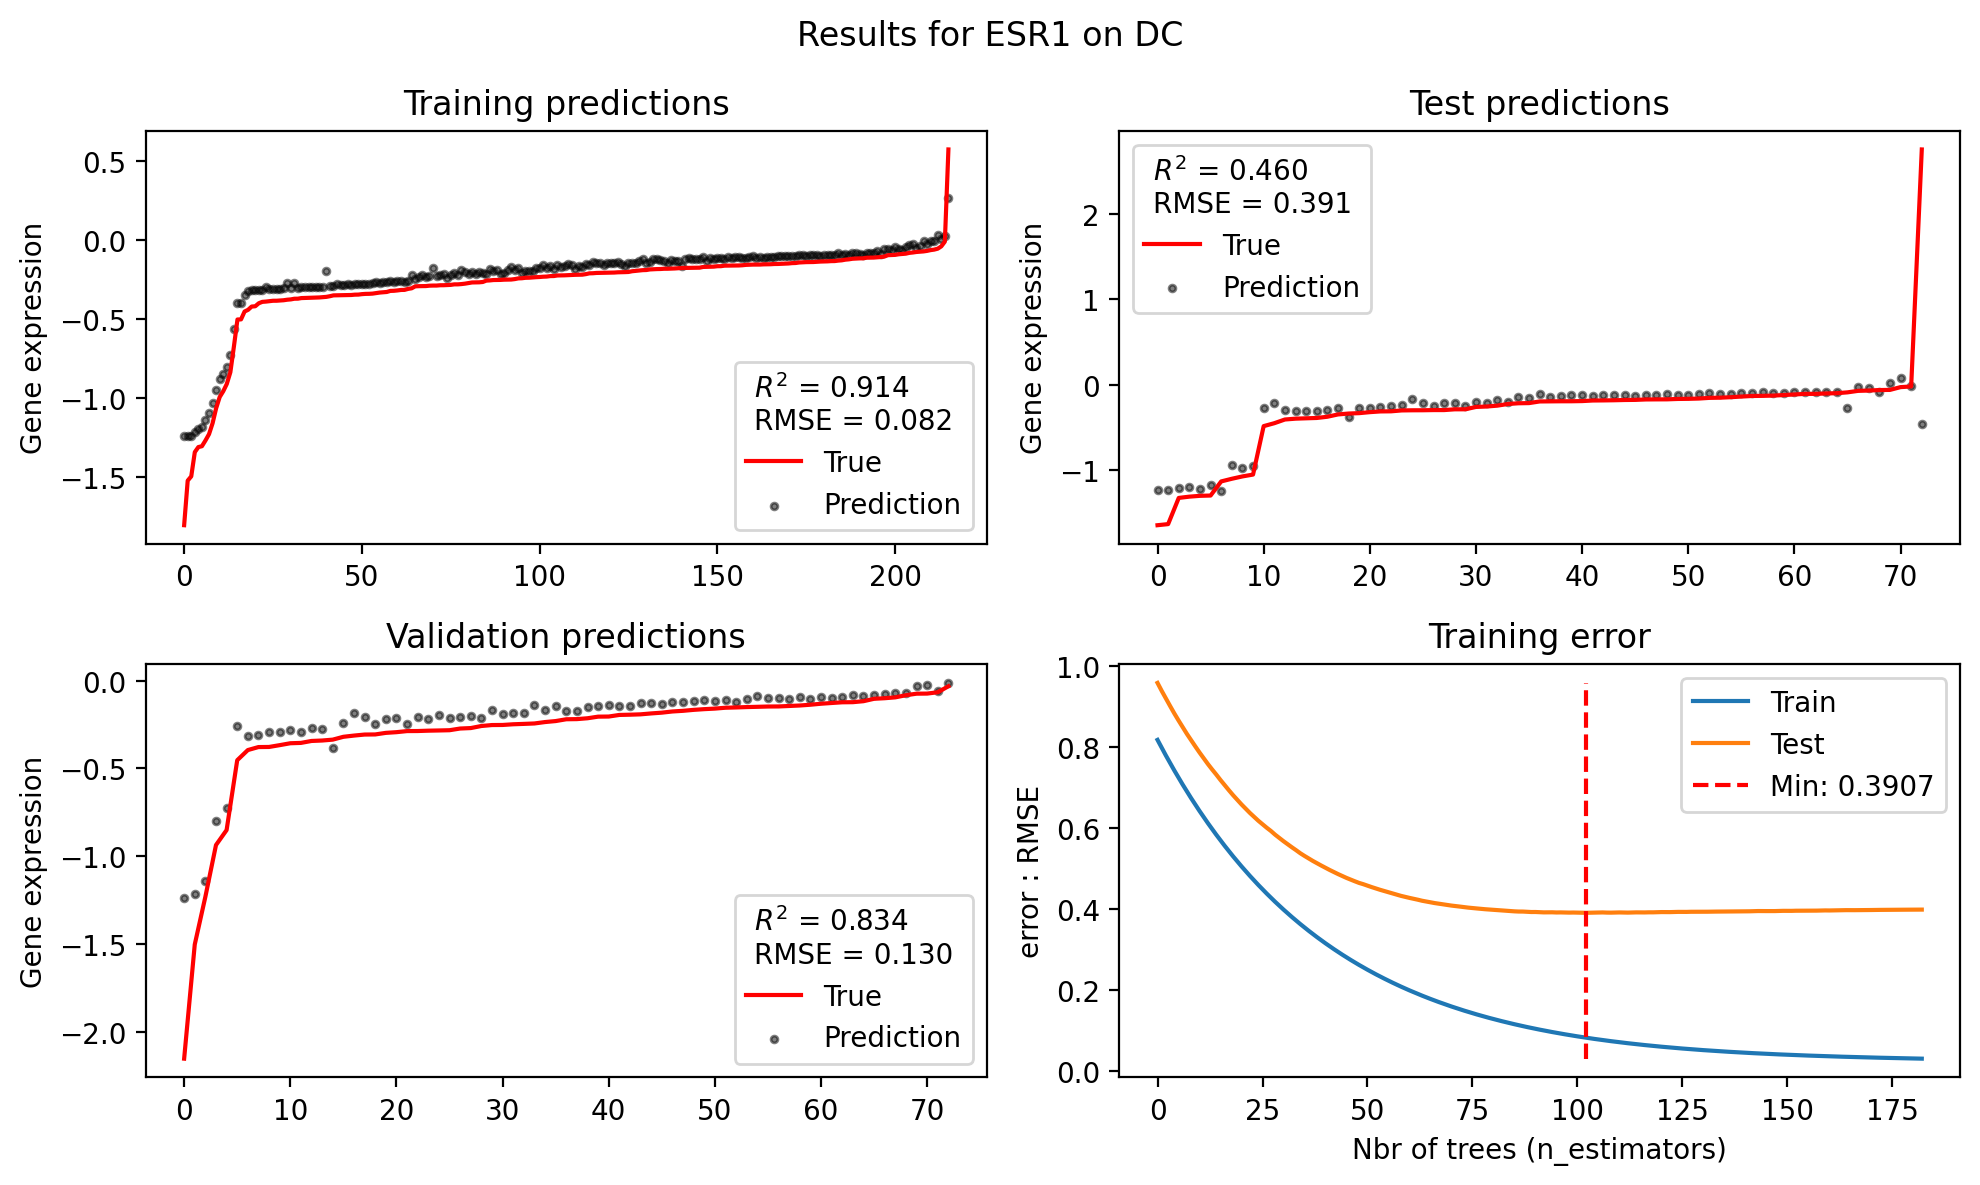

In [79]:
models["DC"].plot_results("ESR1")

4
(4,)


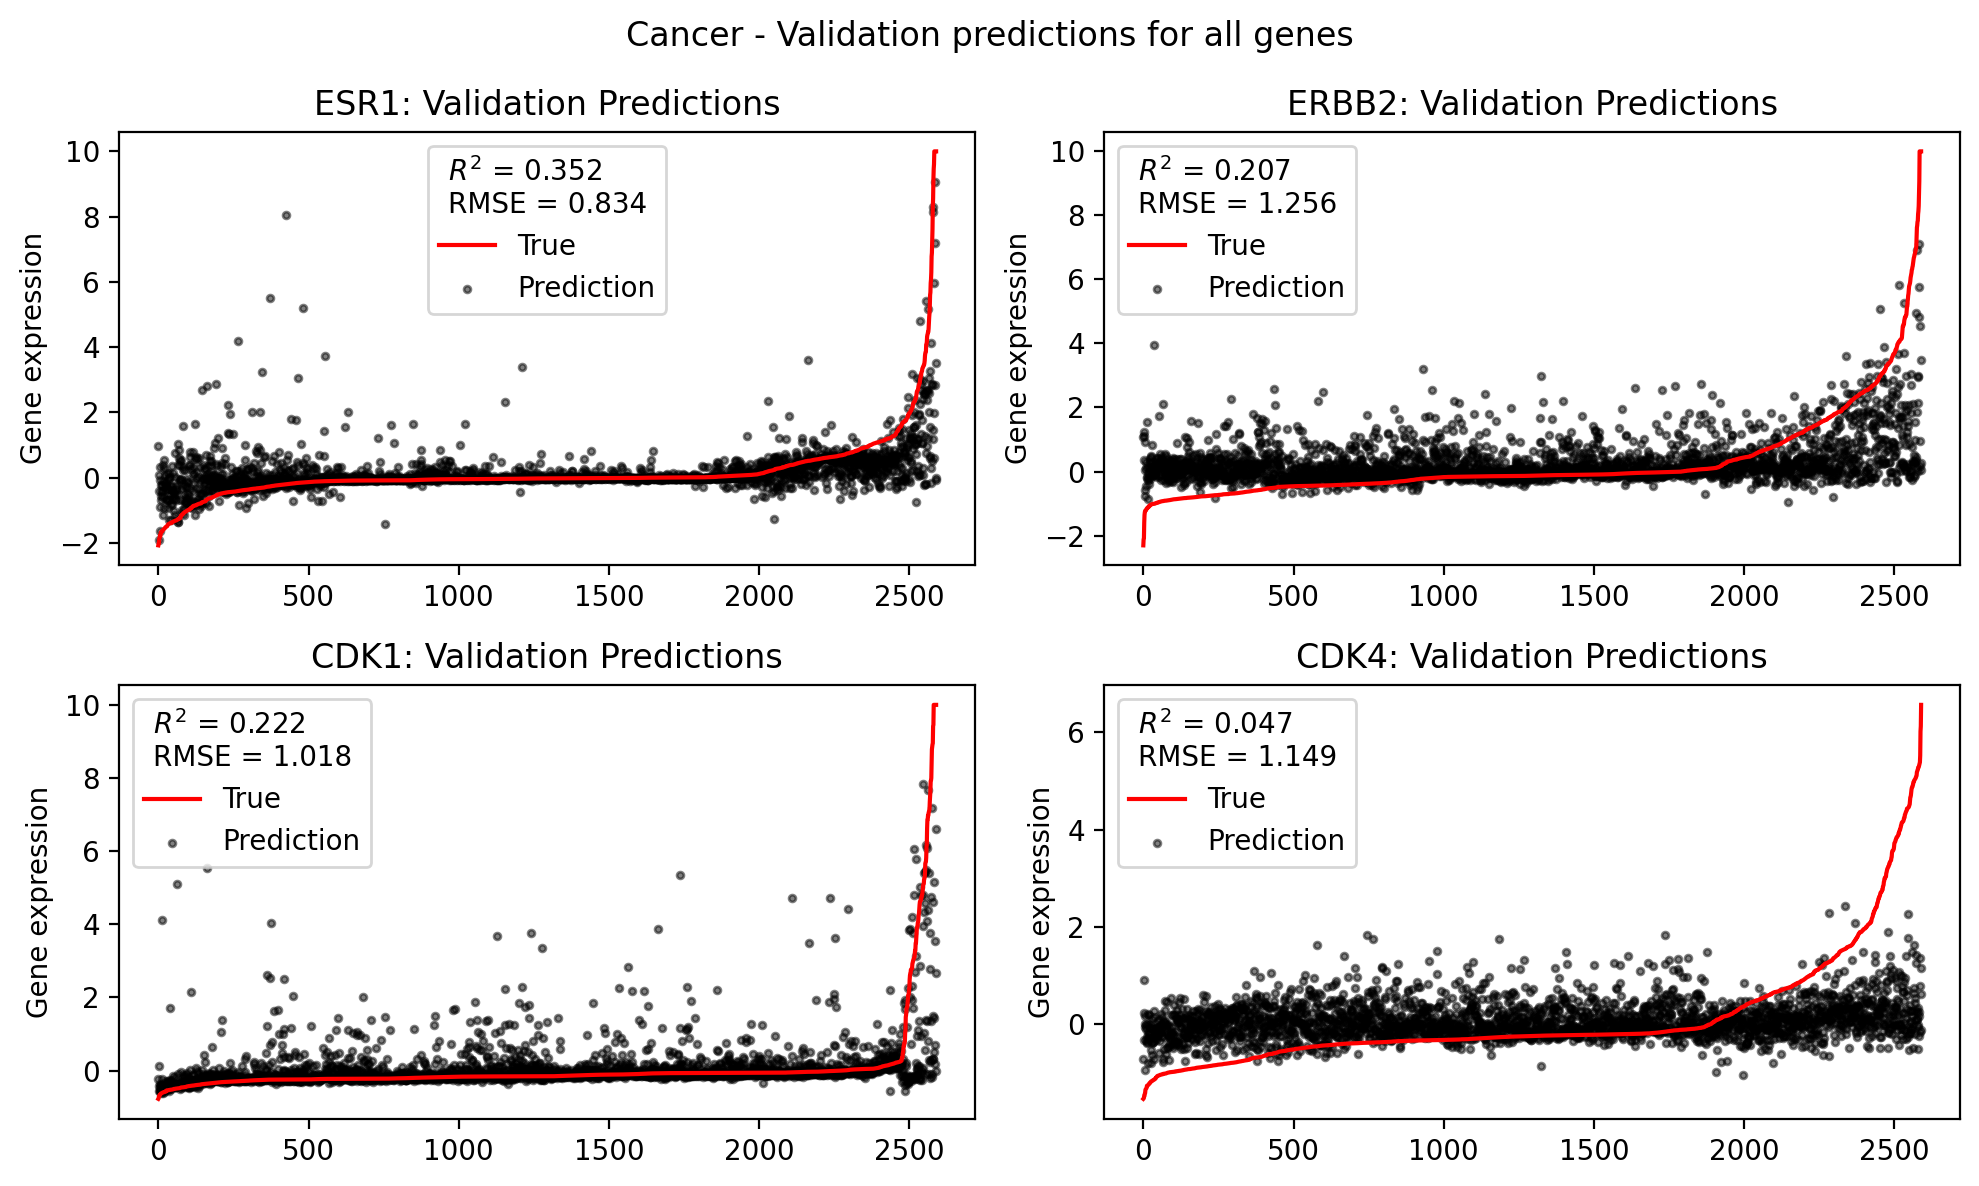

In [79]:
models["Cancer"].plot_validation_all_genes()

The XGBoost parameters used for the 28 models. These are from the notebook `Cancer - ESR1 Model.ipynb` where a gridsearch is performed for the the Cancer - ESR1 model. It is assumed that the genes exhibit similar relationships and that the hyperparameters should be similar for all models though this might not be a valid assumption.

# SHAP Analysis DC

In [80]:
models["DC"].shap_analysis()

Calculating shap_values for ESR1... Completed
Calculating interactions for ESR1...Completed
Calculating shap_values for ERBB2... Completed
Calculating interactions for ERBB2...Completed
Calculating shap_values for CDK1... Completed
Calculating interactions for CDK1...Completed
Calculating shap_values for CDK4... Completed
Calculating interactions for CDK4...Completed
Shap analysis completed


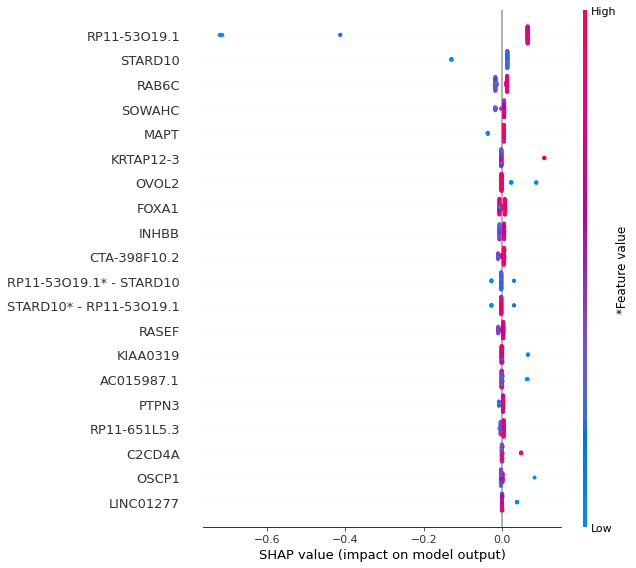

In [81]:
models["DC"].shap_interaction("ESR1", max_display=20)

## SHAP Analysis Cancer

In [121]:
import shap
import numpy as np
import matplotlib.pyplot as plt

In [82]:
models["Cancer"].shap_analysis()

Calculating shap_values for ESR1... Completed
Calculating interactions for ESR1...Completed
Calculating shap_values for ERBB2... Completed
Calculating interactions for ERBB2...Completed
Calculating shap_values for CDK1... Completed
Calculating interactions for CDK1...Completed
Calculating shap_values for CDK4... Completed
Calculating interactions for CDK4...Completed
Shap analysis completed


In [99]:
shap_vals = models["Cancer"].shapley["ESR1"]["shap_vals"]
X = models["Cancer"].datasets["ESR1"]["X_val"]

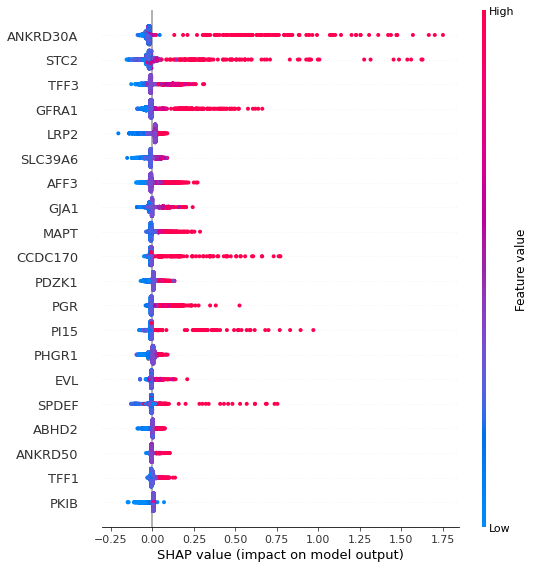

In [101]:
shap.summary_plot(shap_vals, X)

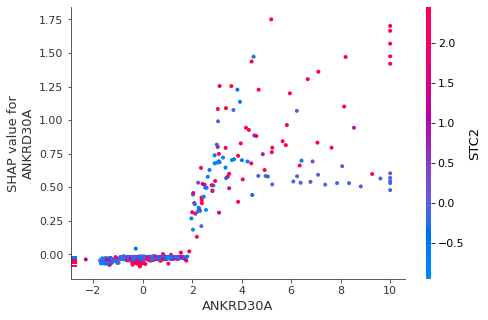

In [105]:
shap.dependence_plot("ANKRD30A", shap_vals, X)

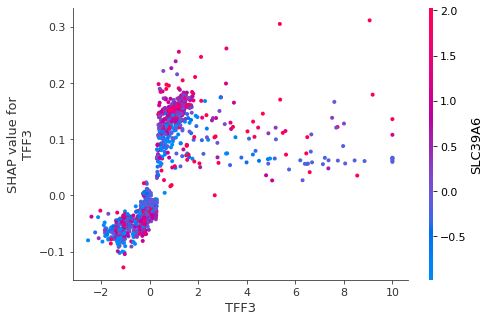

In [104]:
shap.dependence_plot("TFF3", shap_vals, X)

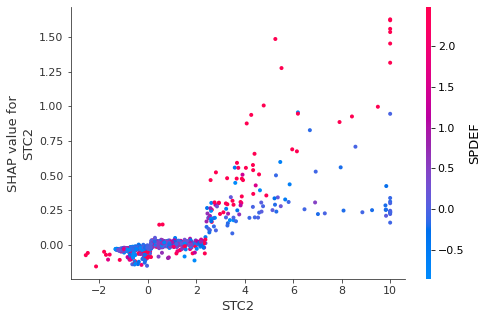

In [103]:
shap.dependence_plot("STC2", shap_vals, X)

In [119]:
abs_shap = np.abs(shap_vals).mean(axis=0)

In [123]:
sorter = np.argsort(abs_shap)

In [129]:
abs_shap[sorter][-10:]

array([0.01852477, 0.01976424, 0.0227999 , 0.02511574, 0.02586822,
       0.02814395, 0.03618463, 0.04301792, 0.04476113, 0.05780125],
      dtype=float32)

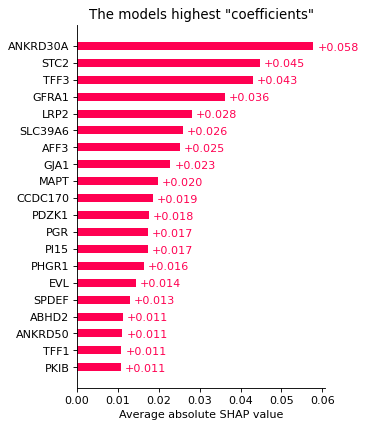

In [166]:
fig, ax = plt.subplots(figsize=(4,6), dpi=80)
ax.barh(np.linspace(0,40,20), abs_shap[sorter][-20:], align='center', height=1, color="#FF0051")
ax.set_yticks(np.linspace(0,40,20))
ax.set_yticklabels(X.columns[sorter][-20:]);
ax.set_xlabel("Average absolute SHAP value")
ax.set_title('The models highest "coefficients"')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for i, v in enumerate(abs_shap[sorter][-20:]):
    ax.text(v + 0.001, np.linspace(0,40,20)[i]-0.55, f"+{v:.3f}", color="#FF0051")
plt.show()

In [112]:
X.col

Genes,RP11-299L17.3,AOC3,CD5,MAP7D3,TIPARP,RSU1,EPB41L4A,ARPC5,PPP1R14A,PPP1R9A,...,PI15,SPDEF,LINC00993,MLPH,AR,CAPN8,GFRA1,AFF3,STC2,ANKRD30A
sc5rJUQ045_CGTTAGAAGGCAGGTT,-0.017950,-0.224483,-0.143265,-0.559713,-0.433597,0.788147,-0.160509,-0.052484,-0.603256,NaN,...,-0.050622,-0.108230,NaN,-0.323183,-0.261728,-0.139379,-0.242539,-0.139350,0.337873,NaN
sc5rJUQ064_GGCAATTTCTCCAACC,-0.019560,-0.196243,-0.033622,-0.116328,-0.406618,-0.450784,-0.350673,-1.222841,-0.117451,-0.232765,...,-0.402507,0.092072,-0.604763,1.512287,0.300355,-0.568806,0.351920,-1.415469,-0.983287,-0.412672
sc5rJUQ053_TGCTGCTCAACTGCGC,-0.019675,-0.102412,-0.354509,-0.184034,-0.162614,-0.468762,-0.092246,-0.759700,3.222287,-0.083949,...,-0.084145,-0.060222,-0.024562,-0.078448,-0.110883,-0.025876,-0.099149,-0.127020,-0.116175,-0.038301
sc5rJUQ053_GCCAAATTCACTCTTA,-0.026086,-0.340772,-0.550494,-0.589436,-0.406389,0.694388,-0.295215,-0.196646,0.439055,-0.337213,...,-0.208109,-0.154551,-0.059410,-0.149215,-0.346379,-0.110358,-0.303865,-0.294635,-0.484670,-0.097495
sc5rJUQ039_TAGCCGGGTGGAAAGA,-0.000737,-0.023398,-0.263033,-0.080771,-0.131494,-0.237639,-0.007995,-0.504218,-0.090597,0.009969,...,-0.002661,0.031709,0.021787,0.007425,0.043695,0.010314,0.022384,-0.161275,0.032302,-0.031654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sc5rJUQ045_GCTGGGTCATCACCCT,0.011476,0.156231,0.132633,-0.409697,0.394092,-0.222766,0.082215,-0.241071,-0.413472,NaN,...,0.012949,-0.220285,NaN,-0.273814,0.062967,0.027966,0.092438,0.053553,-0.176216,NaN
sc5rJUQ039_ATAAGAGTCCTTCAAT,-0.001463,-0.026835,-0.265103,-0.084400,-0.133686,-0.242021,-0.010559,-0.509716,-0.093158,0.007931,...,-0.004765,0.029183,0.020013,0.004397,0.040124,0.008590,0.019306,-0.163585,0.029320,-0.033387
sc5rJUQ042_TACTCGCCACGACTCG,0.034572,-0.052512,-0.492707,-0.145298,-0.205878,-0.254437,0.003704,-0.633512,-0.110650,0.022877,...,0.034865,0.062610,0.079054,0.089918,0.066893,0.094708,-0.061912,-0.141145,0.121471,0.019863
sc5rJUQ064_ATAAGAGAGTCATGCT,-0.011788,-0.088967,-0.172391,-0.130917,-0.348110,-0.334178,-0.208712,-0.941232,-0.153261,-0.149323,...,-0.233042,1.395143,1.276066,0.944353,0.764941,-0.468223,-0.561107,-1.130390,1.419634,0.183411


In [83]:
models["Cancer"].shapley["ESR1"]["shap_interaction"].shape

(2590, 1000, 1000)

[autoreload of src.model_builder failed: Traceback (most recent call last):
  File "/home/severs/.conda/envs/ml-severs/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/severs/.conda/envs/ml-severs/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/severs/.conda/envs/ml-severs/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/severs/.conda/envs/ml-severs/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 851, in exec_module
  File "<frozen importlib._bootstrap_external>", line 988, in get_code
  File "<frozen importlib._bootstrap_external>", line 918, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _ca

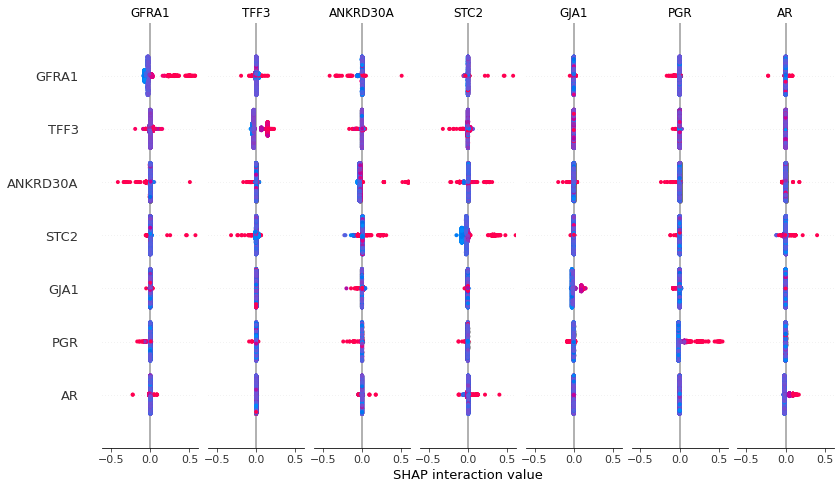

In [376]:
shap.summary_plot(models["Cancer"].shapley["ESR1"]["shap_interaction"], data["X_val"], plot_type="dot")

In [86]:
shap.summary_plot(models["Cancer"].shapley["ESR1"]["shap_vals"], data["X_val"], plot_type="dot")

NameError: name 'data' is not defined

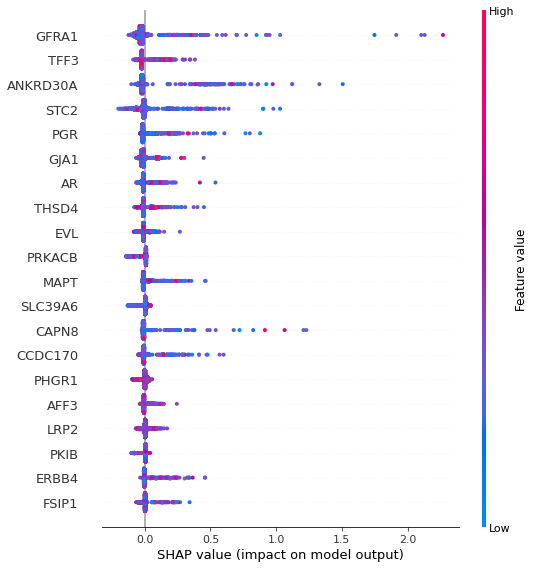

In [397]:
shap.summary_plot(models["Cancer"].shapley["ESR1"]["shap_vals"], data["X_val"])

In [91]:
models["Cancer"].shap_bar("ESR1")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [92]:
shap_vals = models["Cancer"].shapley["ESR1"]["shap_vals"]

In [96]:
shap_vals.shape

(2590, 1000)

In [97]:
shap.plots.bar(shap_vals)

AssertionError: You must pass an Explanation object, Cohorts object, or dictionary to bar plot!

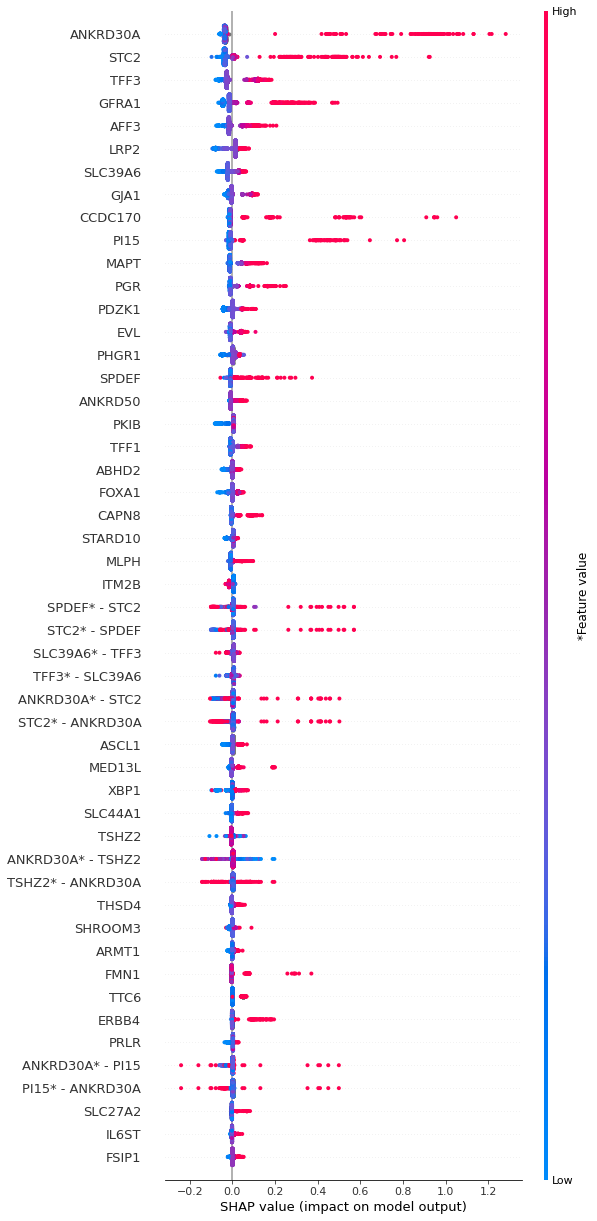

In [88]:
models["Cancer"].shap_interaction("ESR1", max_display=50)

In [395]:
models["Cancer"].shap_analysis("ESR1")

Calculating shap_values for ESR1... Completed
Calculating interactions for ESR1...Completed
Shap analysis completed


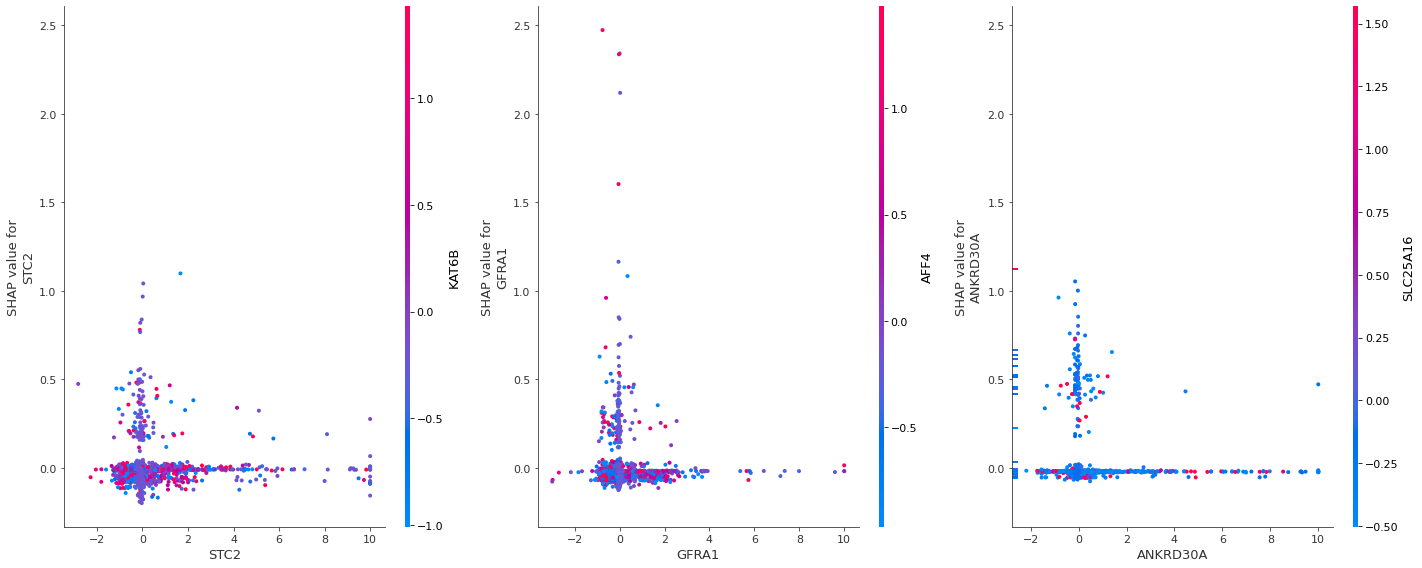

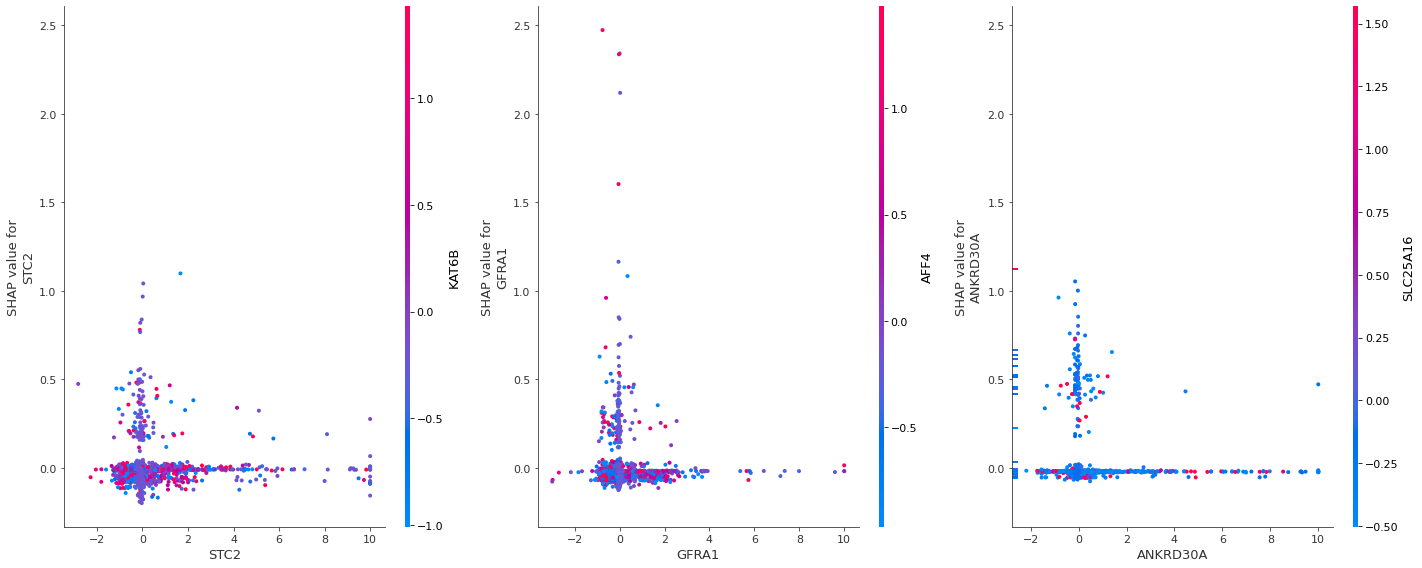

In [380]:
models["Cancer"].shap_dependence("ESR1", ["STC2", "GFRA1", "ANKRD30A"])

In [378]:
setattr(models["Cancer"], "shap_analysis_complete", True)

In [172]:
data = models["Cancer"].datasets["ESR1"]

In [ ]:
shap_vals = self.explainer.shap_values(data["X_val"])

In [173]:
import shap

In [174]:
exp = shap.TreeExplainer(models["Cancer"]["ESR1"])

In [175]:
shap_values = exp.shap_values(data["X_val"])

In [382]:
data["X_val"].columns.get_loc("ANKRD30A")

999

In [233]:
data["X_val"].columns.get_loc("GFRA1")

996

In [ ]:
models

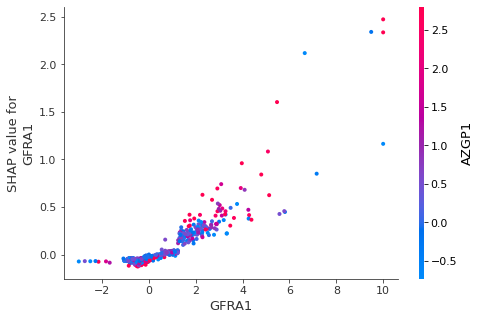

In [381]:
shap.dependence_plot(996,shap_values, data["X_val"])

In [209]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [211]:
colors = ["#0089FA", "#FF0051"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

Text(0.5, 1.0, 'Relationship between STC2, ANKRD30A, and ESR1')

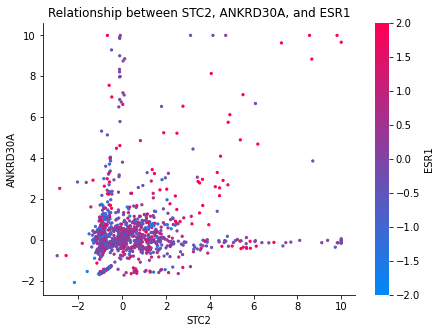

In [393]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
plot1 = ax.scatter(data["X_val"]["STC2"],  data["X_val"].ANKRD30A, s=5,alpha=1, c=data["y_val"], cmap=cmap1)
plt.xlabel("STC2")
plt.ylabel("ANKRD30A")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plot1.set_clim(-2,2)
cb = plt.colorbar(plot1)
cb.outline.set_visible(False)
cb.set_label('ESR1')
plt.title("Relationship between STC2, ANKRD30A, and ESR1")